In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Activation,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
X_train =np.loadtxt('input.csv',delimiter=',')
y_train =np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [9]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = y_train.reshape(len(y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = y_test.reshape(len(y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape) 
print("shape of Y_test:", Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


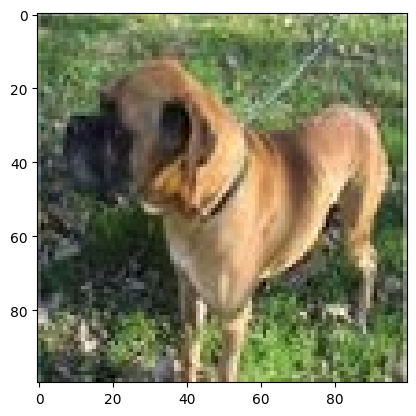

In [14]:
idx =random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [18]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation ='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [19]:
from tensorflow.keras.layers import MaxPooling2D

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [21]:
X_train=X_train.reshape(len(X_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)
X_train=X_train/255.0
X_test=X_test/255.0

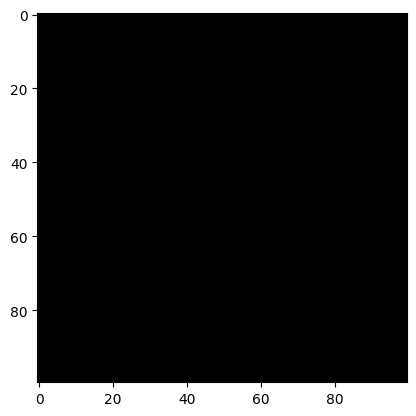

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
The image is of a Dog


In [22]:
idx2=random.randint(0,len(X_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    print("The image is of a Dog")
else:
    print("The image is of a Cat")    